# LOAN PREDICTION

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline 
import warnings 

In [2]:
data=pd.read_csv("train_ctrUa4K.csv") 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
data.shape

(614, 13)

In [6]:
#target variable='Loan_Status'
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

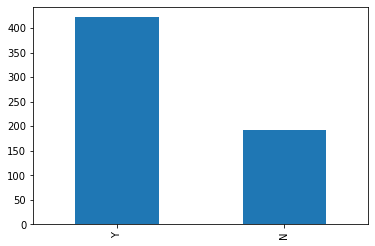

In [7]:
#distribution of target variable
data['Loan_Status'].value_counts().plot.bar()

In [8]:
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':'Gender'}>

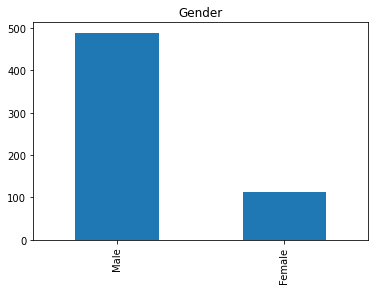

In [9]:
data['Gender'].value_counts().plot.bar(title= 'Gender') 

<AxesSubplot:title={'center':'Married'}>

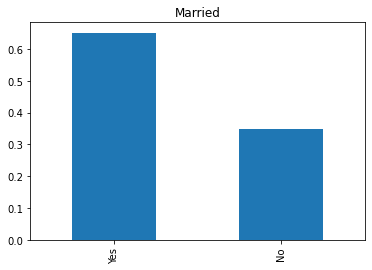

In [10]:
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

<AxesSubplot:title={'center':'Self_Employed'}>

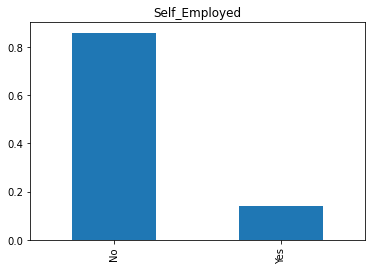

In [11]:
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

<AxesSubplot:title={'center':'Credit_History'}>

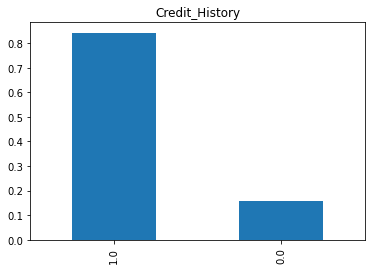

In [12]:
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

<AxesSubplot:title={'center':'Education'}>

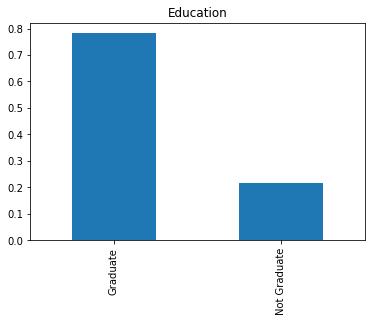

In [13]:
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

<AxesSubplot:title={'center':'Property_Area'}>

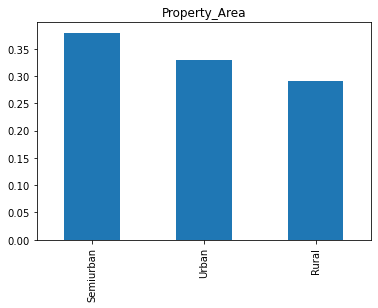

In [14]:
data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

C:\Users\mdhar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


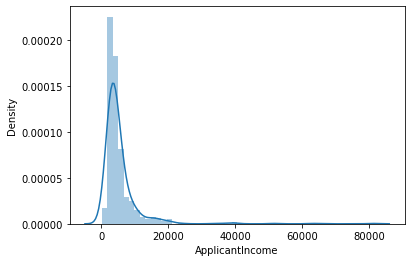

In [15]:
#distribution of applicant income
sns.distplot(data['ApplicantIncome']); 

<AxesSubplot:>

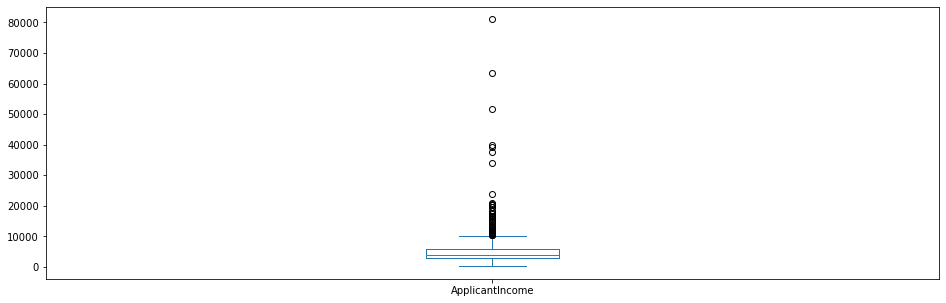

In [16]:
#outliers in applicant income
data['ApplicantIncome'].plot.box(figsize=(16,5))

C:\Users\mdhar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


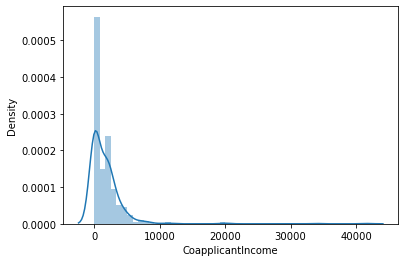

In [17]:
#distribution and outliers in coapploicant income
sns.distplot(data['CoapplicantIncome']); 

<AxesSubplot:>

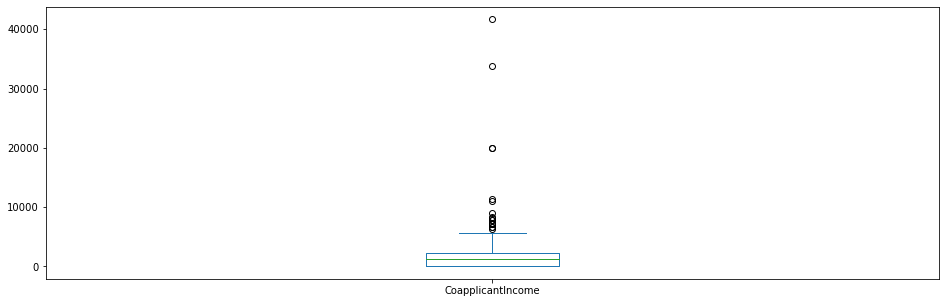

In [18]:
data['CoapplicantIncome'].plot.box(figsize=(16,5))

Text(0.5, 0.98, '')

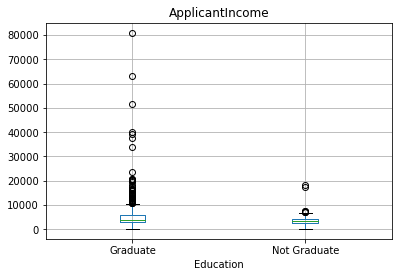

In [19]:
data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

Text(0.5, 0.98, '')

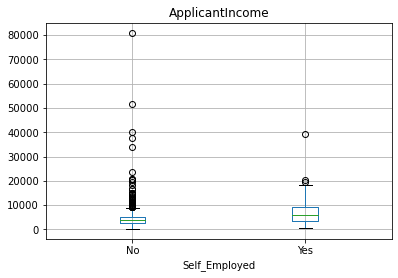

In [20]:
data.boxplot(column='ApplicantIncome', by = 'Self_Employed') 
plt.suptitle("")

<AxesSubplot:title={'center':'Gender'}, xlabel='Gender'>

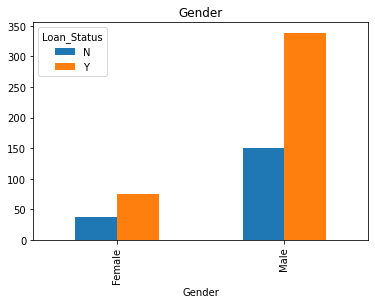

In [21]:
#analysis of target variable wrt to gender
Gender=pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.plot.bar(title= 'Gender')

<AxesSubplot:xlabel='Married'>

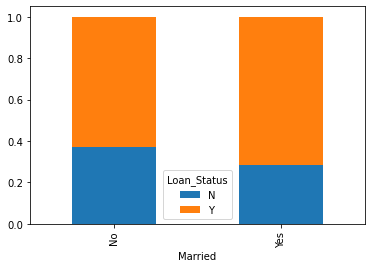

In [22]:
Married=pd.crosstab(data['Married'],data['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<AxesSubplot:title={'center':'Dependents'}, xlabel='Dependents'>

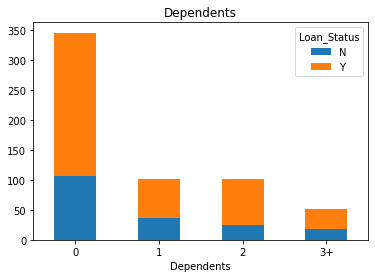

In [23]:
Dependents=pd.crosstab(data['Dependents'],data['Loan_Status']) 
Dependents.plot.bar(title= 'Dependents', stacked=True, rot=0)

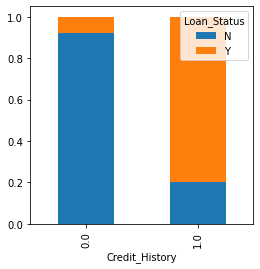

In [24]:
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

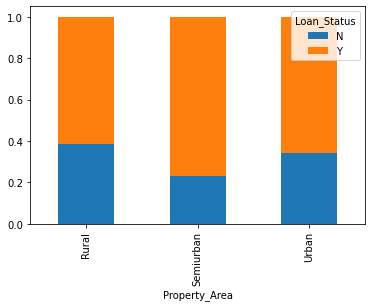

In [25]:
Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

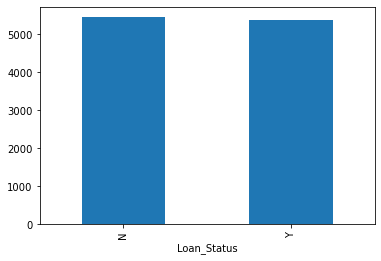

In [26]:
#Analysis of target variable wrt mean of applicant income
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [27]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [28]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
data['Income_bin']=pd.cut(data['ApplicantIncome'],bins,labels=group)
data['Income_bin']

0           High
1           High
2        Average
3        Average
4           High
         ...    
609      Average
610         High
611    Very high
612    Very high
613         High
Name: Income_bin, Length: 614, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very high']

<AxesSubplot:title={'center':'Income_bin'}>

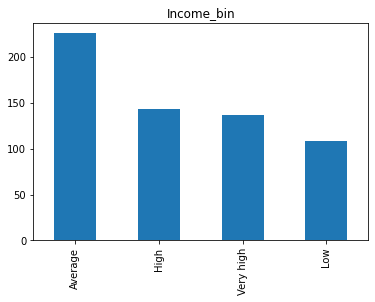

In [29]:
data['Income_bin'].value_counts().plot.bar(title= 'Income_bin')

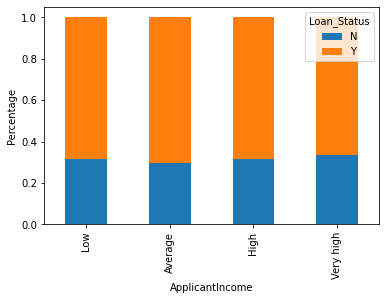

In [30]:
Income_bin=pd.crosstab(data['Income_bin'],data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

In [31]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
data['Coapplicant_Income_bin']=pd.cut(data['CoapplicantIncome'],bins,labels=group)
data['Coapplicant_Income_bin']

0          NaN
1      Average
2          NaN
3      Average
4          NaN
        ...   
609        NaN
610        NaN
611        Low
612        NaN
613        NaN
Name: Coapplicant_Income_bin, Length: 614, dtype: category
Categories (3, object): ['Low' < 'Average' < 'High']

<AxesSubplot:title={'center':'Coapplicant_Income_bin'}>

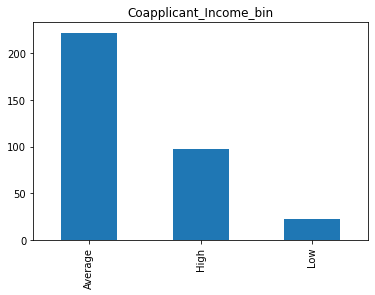

In [32]:
data['Coapplicant_Income_bin'].value_counts().plot.bar(title= 'Coapplicant_Income_bin')

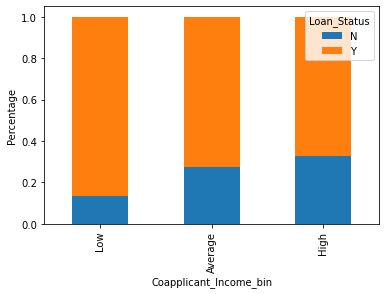

In [33]:
Coapplicant_Income_bin=pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Coapplicant_Income_bin') 

P = plt.ylabel('Percentage')

In [34]:
#total income =applicant income+coapplicant income
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
data['Total_Income'].head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Total_Income, dtype: float64

In [35]:
data['Total_Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64

In [36]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
data['Total_Income_bin']=pd.cut(data['Total_Income'],bins,labels=group)

In [37]:
data['Total_Income_bin'].head()

0         High
1    Very high
2      Average
3         High
4         High
Name: Total_Income_bin, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very high']

<AxesSubplot:title={'center':'Total_Income_bin'}>

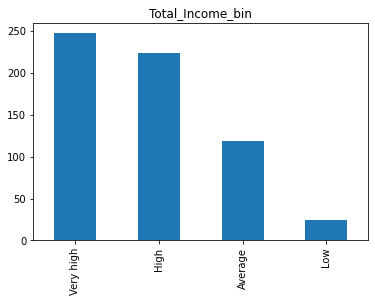

In [38]:
data['Total_Income_bin'].value_counts().plot.bar(title= 'Total_Income_bin')

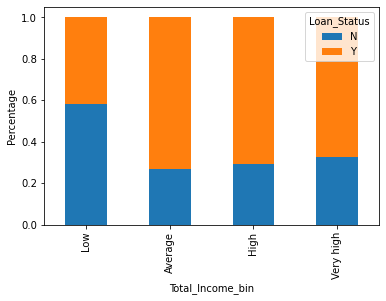

In [39]:
Total_Income_bin=pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income_bin') 
P = plt.ylabel('Percentage')

In [40]:
data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [41]:
bins=[0,100,200,700]
group=['Low','Average','High'] 
data['LoanAmount_bin']=pd.cut(data['LoanAmount'],bins,labels=group)
data['LoanAmount_bin'].head()

0        NaN
1    Average
2        Low
3    Average
4    Average
Name: LoanAmount_bin, dtype: category
Categories (3, object): ['Low' < 'Average' < 'High']

<AxesSubplot:title={'center':'LoanAmount_bin'}>

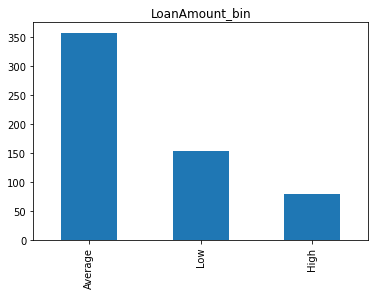

In [42]:
data['LoanAmount_bin'].value_counts().plot.bar(title= 'LoanAmount_bin')

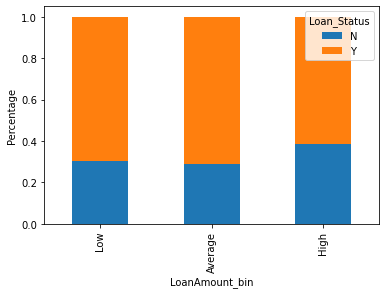

In [43]:
LoanAmount_bin=pd.crosstab(data['LoanAmount_bin'],data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount_bin') 
P = plt.ylabel('Percentage')

In [44]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [47]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [50]:
# df = pd.read_csv("train_ctrUa4K.csv", usecols = ['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'])
data=data.drop(columns=['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'])

data['Dependents'].replace('3+', 3,inplace=True) 
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot:>

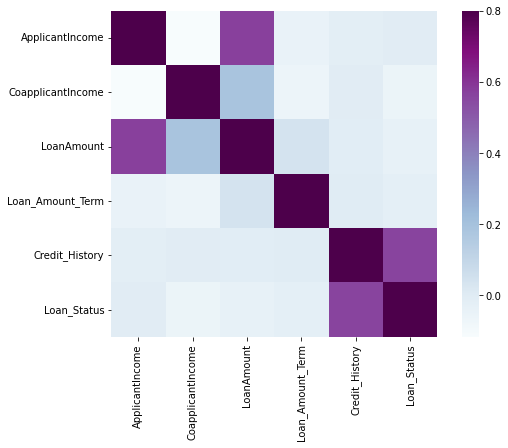

In [51]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [52]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
#treating missing values
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True) 
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True) 
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True) 
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [87]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [55]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [56]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [57]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\mdhar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


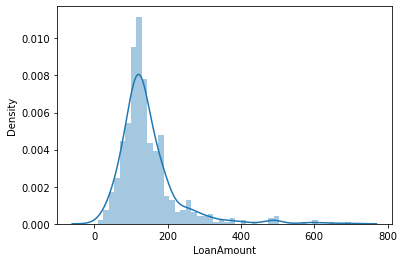

In [60]:
sns.distplot(data['LoanAmount']); 

<AxesSubplot:>

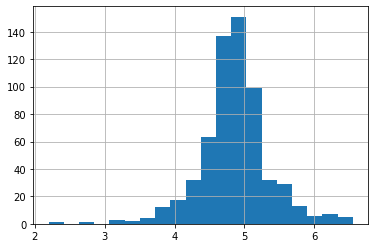

In [58]:
#log tranformation
#log transformation
data['LoanAmount_log'] = np.log(data['LoanAmount']) 
data['LoanAmount_log'].hist(bins=20) 

C:\Users\mdhar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


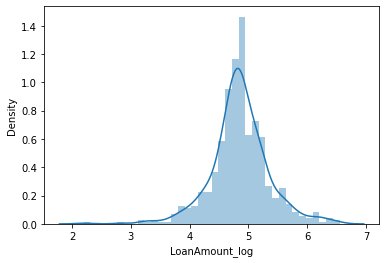

In [59]:
sns.distplot(data['LoanAmount_log']); 

In [61]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0


C:\Users\mdhar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


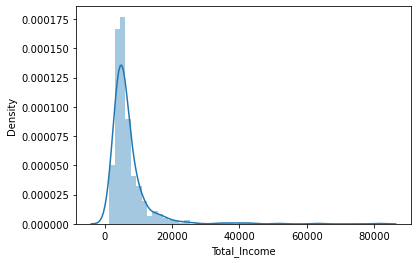

In [62]:
sns.distplot(data['Total_Income']);

C:\Users\mdhar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


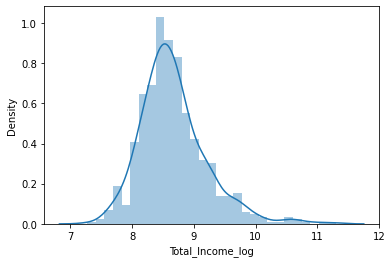

In [63]:
data['Total_Income_log'] = np.log(data['Total_Income']) 
sns.distplot(data['Total_Income_log']); 

In [64]:
data['EMI']=data['LoanAmount']/data['Loan_Amount_Term']
data['EMI'].head()

0    0.355556
1    0.355556
2    0.183333
3    0.333333
4    0.391667
Name: EMI, dtype: float64

C:\Users\mdhar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


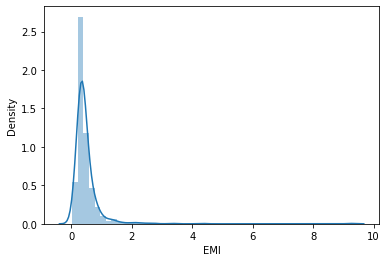

In [66]:
sns.distplot(data['EMI']);

In [67]:
# Multiply with 1000 to make the units equal test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
data['Balance Income']=data['Total_Income']-(data['EMI']*1000)
data['Balance Income'].head()

0    5493.444444
1    5735.444444
2    2816.666667
3    4607.666667
4    5608.333333
Name: Balance Income, dtype: float64

C:\Users\mdhar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


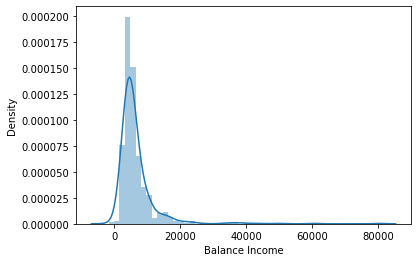

In [68]:
sns.distplot(data['Balance Income']);

In [69]:
#X=data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

In [70]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'Total_Income', 'Total_Income_log', 'EMI',
       'Balance Income'],
      dtype='object')

In [71]:
X = data.drop('Loan_Status',1)
y = data.Loan_Status

C:\Users\mdhar\AppData\Local\Temp\ipykernel_352\1213045602.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('Loan_Status',1)


In [72]:
#dummy variables for the categorical variables
X=pd.get_dummies(X) 
data=pd.get_dummies(data) 

In [73]:
data.head

<bound method NDFrame.head of      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Loan_Status  LoanAmount_log  Total_Income  \
0               1.0        

In [74]:
X.head

<bound method NDFrame.head of      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  LoanAmount_log  Total_Income  Total_Income_log       EMI  \
0           

In [75]:
y.head

<bound method NDFrame.head of 0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64>

In [76]:
#import required libraries
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [77]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=3,shuffle=True) 
accuracy_list = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))   
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    accuracy_list.append(score)
    print('accuracy_score',score)     
    i+=1 
    


1 of kfold 5
accuracy_score 0.7479674796747967

2 of kfold 5
accuracy_score 0.7886178861788617

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7235772357723578

5 of kfold 5
accuracy_score 0.8032786885245902


In [79]:
mean_accuracy = sum(accuracy_list)/ len(accuracy_list)
print(mean_accuracy)

0.7687858190057311
